
best study time prediction based on lms access and assignment grades

In [14]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Memuat dataset yang telah diunggah
student_data_final = pd.read_csv('/root/machine_learning/project_ml/Student_performance_data.csv')

# Menampilkan beberapa baris pertama untuk memeriksa struktur dataset
student_data_final.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


/tmp/ipykernel_9939/2966561049.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=student_data_final, ax=axs[1, 1], palette='Set2')


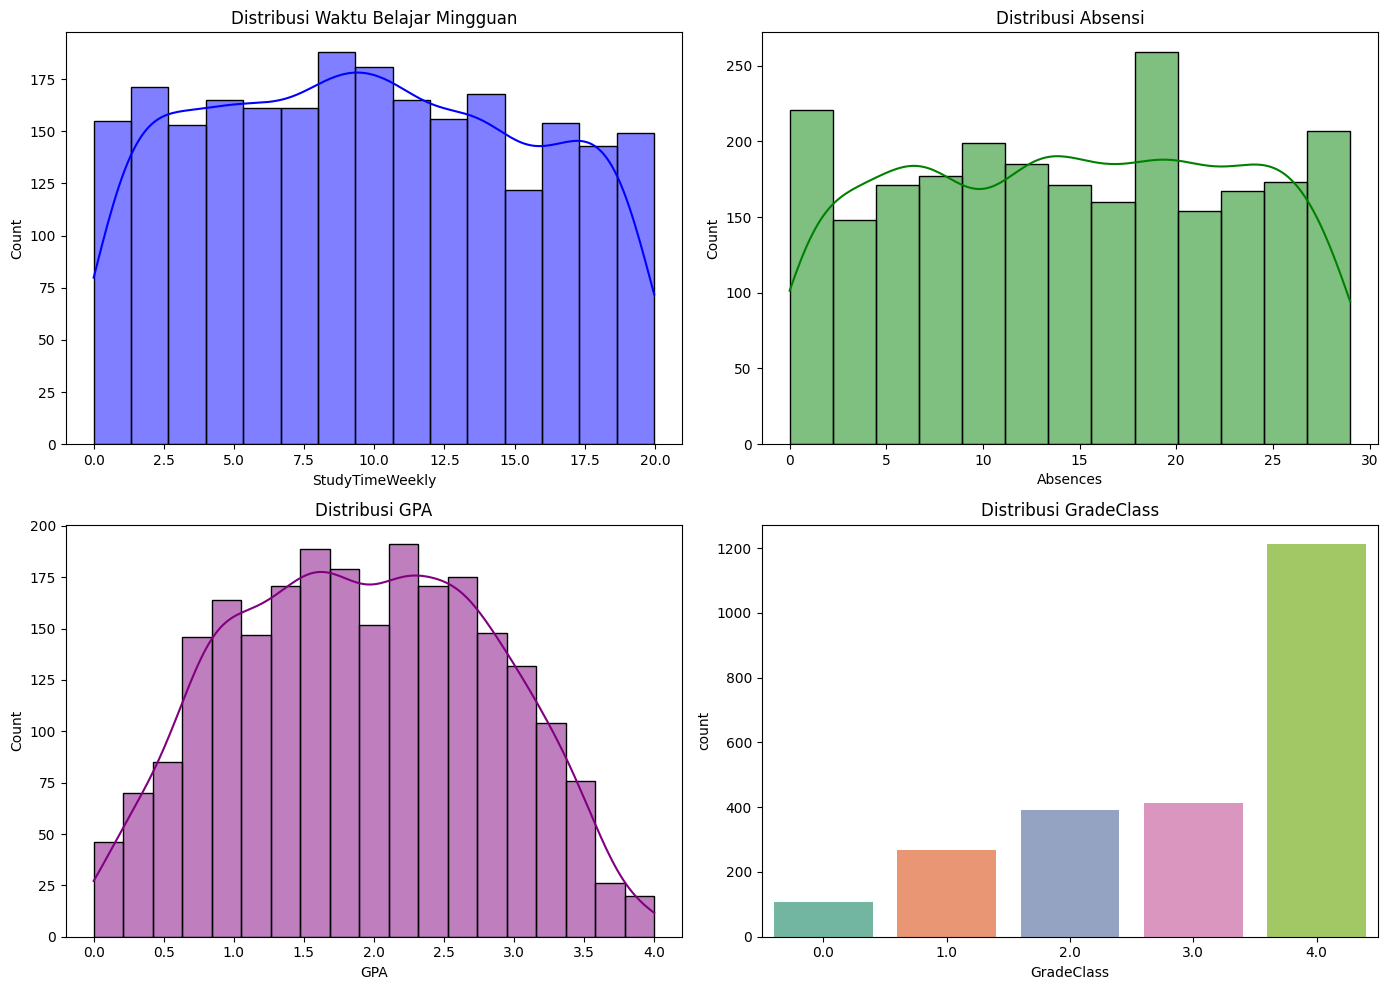

In [16]:
# Visualisasi distribusi dari beberapa fitur utama
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# StudyTimeWeekly
sns.histplot(student_data_final['StudyTimeWeekly'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribusi Waktu Belajar Mingguan')

# Absences
sns.histplot(student_data_final['Absences'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribusi Absensi')

# GPA
sns.histplot(student_data_final['GPA'], kde=True, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Distribusi GPA')

# GradeClass (dalam bentuk kategori)
sns.countplot(x='GradeClass', data=student_data_final, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title('Distribusi GradeClass')

plt.tight_layout()
plt.show()

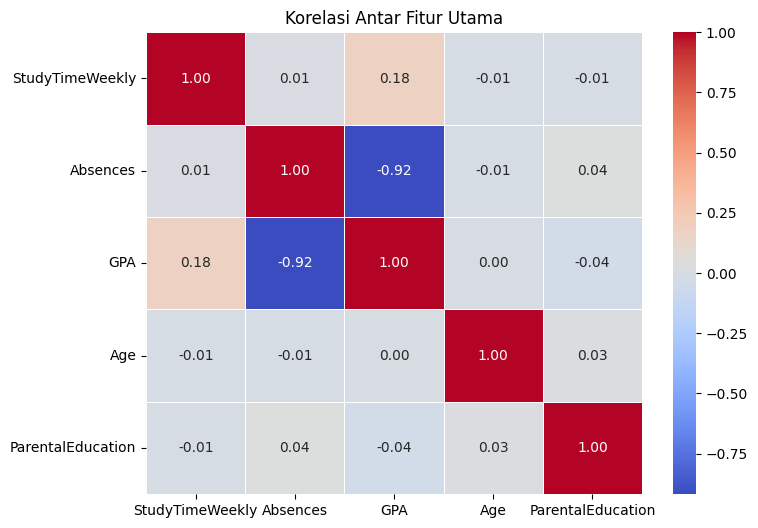

In [17]:
# Menghitung korelasi antar fitur utama
correlation_matrix = student_data_final[['StudyTimeWeekly', 'Absences', 'GPA', 'Age', 'ParentalEducation']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur Utama')
plt.show()

/tmp/ipykernel_9939/4248989351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=student_data_final, palette='Set1')


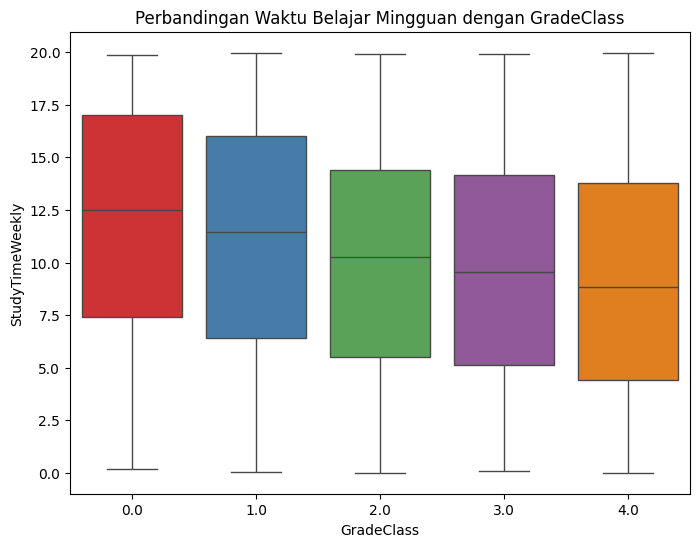

/tmp/ipykernel_9939/4248989351.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GradeClass', y='Absences', data=student_data_final, palette='Set2')


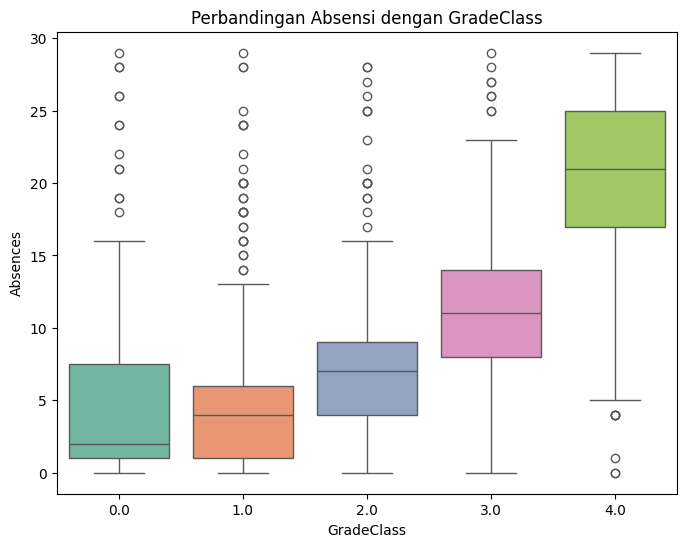

/tmp/ipykernel_9939/4248989351.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GradeClass', y='GPA', data=student_data_final, palette='Set3')


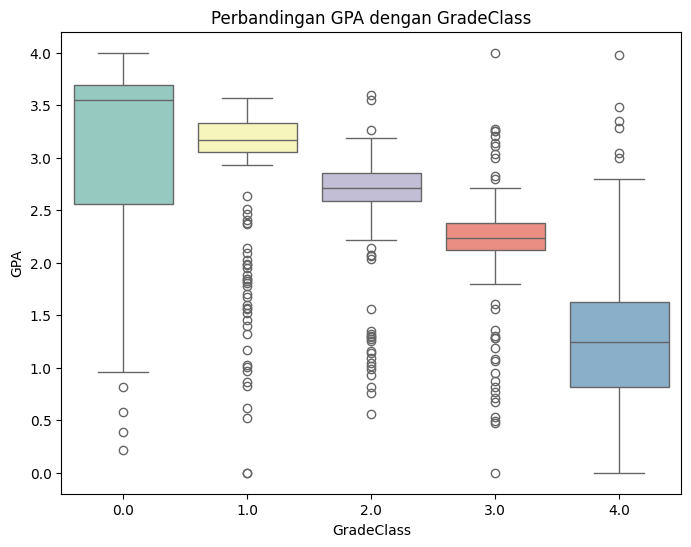

In [18]:
# Visualisasi perbandingan StudyTimeWeekly dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=student_data_final, palette='Set1')
plt.title('Perbandingan Waktu Belajar Mingguan dengan GradeClass')
plt.show()

# Visualisasi perbandingan Absences dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='Absences', data=student_data_final, palette='Set2')
plt.title('Perbandingan Absensi dengan GradeClass')
plt.show()

# Visualisasi perbandingan GPA dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='GPA', data=student_data_final, palette='Set3')
plt.title('Perbandingan GPA dengan GradeClass')
plt.show()